By Pravin Ravishanker (Machine Learning at Berkeley)

For Lecture 2, we will be analyzing climate change data from our very own Lawrence Berkeley National Laboratory's Berkeley Earth Project (which has compiled data from government agencies such as the NOAA and NASA).  

(data available from Kaggle at https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) 

Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports. This massive dataset contains global average land and ocean temperatures collected on several days since 1750 in different cities, states, and nations around the world. 

To begin, make sure you that you have an installation of Jupyter (which you probably have already installed for Homework 1) and of Plotly, which is a very nice visualization and graphics library with support for data science languages such as Python and R. You must also install Seaborn, a nice plotting library that we use to plot bar plots. 

# Installations
pip install plotly 
pip3 install jupyter
pip install seaborn for all external imports.

In [18]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import matplotlib.dates as mdates

# external imports
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

The file is a csv, so we can use pandas to load it into a dataframe. We supply the column name 'dt' to parse_dates to make sure that the date representation in this object is 

In [19]:
# read file in
df = pd.read_csv('GlobalLandTemperaturesByCity.csv', parse_dates=['dt'], index_col=False)

Our Data has 8,599,212 rows and 7 columns. We have 8,599,212 measurements of Average Temperature (in degrees Celsius) on 3,167 different days since 1750 in 3448 cities and 159 countries. 

The Average Temperature Uncertainty for each Average Temp measurement represents a 95% confidence interval for that particular temperature measurement. Ex: (6.068 - 1.737, 6.068 + 1.737) = (4.331, 7.805) represents a 95% Confidence Interval for the average temperature in Arhus, Denmark (quite cold there) on November 1st, 1743.

In [20]:
df.columns = ["Date", "AverageTemperature", "AverageTemperatureUncertainty", "City", "Country", "Latitude", "Longitude"]
df 
# (can also try out df.head() to see the first couple of rows of the table)


,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


The shape attribute tells us how many rows x how many columns of the dataframe.

In [21]:
df.shape

(8599212, 7)

Although our dataset has 8,599,212 rows, many combinations of cities and dates have NaN (or missing) temperature data. We should clean our dataset to remove these NAs. 

In [22]:
df = df.dropna() # remove all rows that have NaNs

In [23]:
df.shape

(8235082, 7)

Our dataset now has 8,235,082 rows and 7 columns. How can we extract each of the names of our columns?

In [24]:
df.columns

Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

How many unique cities do we have temperature data for? 

In [25]:
len(df.City.unique())

3448

How many unique countries do we have temperature data for? Well, 159 countries.

In [26]:
df.Country.unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

How many unique days since 1750 do we have temperature data for?

In [27]:
len(df.Date.unique())

3167

The describe() method provides us some useful summary statistics on the numerical data in the dataframe.

In [28]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


We can access individual fields (or columns) of our dataframe in pandas using:

In [29]:
df.AverageTemperature

0           6.068
5           5.788
6          10.644
7          14.051
8          16.082
10         12.781
11          7.950
12          4.639
13          0.122
14         -1.333
15         -2.732
16          0.129
17          4.042
74          1.699
75          3.961
76          5.182
77          7.197
78         10.634
79         14.913
80         17.831
81         16.848
82         13.143
83          5.251
85         -0.678
86         -0.623
87         -3.764
88          3.700
89          5.267
91         14.429
92         16.638
            ...  
8599181     5.917
8599182    12.554
8599183    14.066
8599184    16.273
8599185    16.020
8599186    16.975
8599187    15.788
8599188    11.337
8599189     6.990
8599190     5.722
8599191     4.348
8599192     0.376
8599193     7.863
8599194     8.101
8599195    14.169
8599196    14.702
8599197    17.329
8599198    18.588
8599199    14.333
8599200    10.358
8599201     6.469
8599202     4.303
8599203     1.479
8599204     1.559
8599205   

If we just want the date, Average Temperature, City, and Country (and don't want the Temperature Uncertainty, Latitude, or Longitude), we can select certain columns from the data frame in the following manner:

In [30]:
df_selected_columns = df[['Date', 'AverageTemperature', 'City', 'Country']]
df_selected_columns.head()

,Date,AverageTemperature,City,Country
0,1743-11-01,6.068,Århus,Denmark
5,1744-04-01,5.788,Århus,Denmark
6,1744-05-01,10.644,Århus,Denmark
7,1744-06-01,14.051,Århus,Denmark
8,1744-07-01,16.082,Århus,Denmark


What if we are only interested in Average Temperature of the city of Berkeley, CA? We can use the following syntax to get only those temperature measurements/rows that have df.City equal to "Berkeley". There are 1,977 measurements of temperature in the city of Berkeley from Jan 1, 1849 to September 1, 2013.  

In [31]:
berkeley_temp = df[df.City == "Berkeley"]
print(berkeley_temp.shape)
berkeley_temp.head()

(1977, 7)


,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
853365,1849-01-01,8.092,2.192,Berkeley,United States,37.78N,122.03W
853366,1849-02-01,9.508,1.850,Berkeley,United States,37.78N,122.03W
853367,1849-03-01,11.701,2.129,Berkeley,United States,37.78N,122.03W
853368,1849-04-01,13.102,2.559,Berkeley,United States,37.78N,122.03W
853369,1849-05-01,14.045,1.909,Berkeley,United States,37.78N,122.03W


Let's plot the average annual temperature in Berkeley, CA over time to see if there if there is an observable trend in global warming. We will use the pandas function groupby(), which enables us to group our data points according to the year.

The average annual temperature line graph is pretty sharp and jagged, so a nice way of seeing if there is an upward trend in temperature is to use some type of cumulative average. The exponentially-weighted moving average of time-series data is a form of a cumulative average that prioritizes temperature measurements at more recent time points over other measurements. (https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average)

The exp-weighted moving average shows that the average annual temperature has increased in Berkeley over centuries.

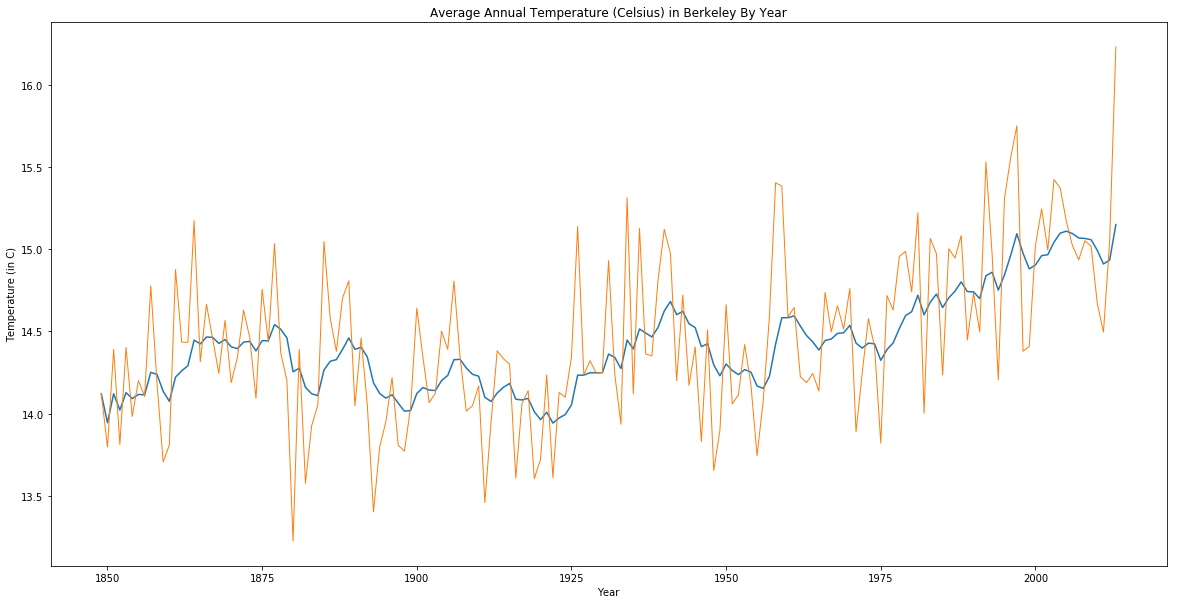

In [17]:
berkeley_temp_grouped = berkeley_temp.groupby(berkeley_temp.Date.dt.year).mean()

plt.figure(figsize=(20,10))
pd.stats.moments.ewma(berkeley_temp_grouped.AverageTemperature, 5).plot()
berkeley_temp_grouped.AverageTemperature.plot(linewidth=1)

plt.title('Average Annual Temperature (Celsius) in Berkeley By Year')
plt.xlabel('Year')
plt.ylabel('Temperature (in C)')
plt.show()

Let's plot the global average land temperature (annual average), just as we plotted the temperature for Berkeley alone. There is a clear global warming trend (Climate change is not a hoax!) Let's also examine the extent to which global average land temperatures across centuries are affected by El Nino (warming) and La Nina (cooling) weather patterns.

In [ ]:
global_temp = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'], index_col=False).dropna()
global_temp["Year"] = global_temp["dt"].dt.year
global_temp_grouped = global_temp.groupby(global_temp.dt.dt.year).mean()

plt.figure(figsize=(20,10))
pd.stats.moments.ewma(global_temp_grouped.LandAverageTemperature, 5).plot()
global_temp_grouped.LandAverageTemperature.plot(linewidth=1)

plt.title('Global Average Land Annual Temperature (Celsius) By Year')
plt.xlabel('Year')
plt.ylabel('Temperature (in C)')

plt.show()

Global weather patterns don't seem to be much affected by El Nino and La Nina. Instead, let's focus on countries in Asia and North/South America that are affected by El Nino. Specifically, let's look at the country of Ecuador and see how it is effected by El Nino and La Nina. 

In [ ]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'], index_col=False).dropna()
ecuador_temperature = global_temp_country[global_temp_country['Country'] == "Ecuador"]
ecuador_temperature["Year"] = ecuador_temperature["dt"].dt.year
ecuador_temperature = ecuador_temperature[ecuador_temperature["Year"] > 1950]
ecuador_temperature_grouped = ecuador_temperature.groupby(ecuador_temperature.dt.dt.year).mean()

plt.figure(figsize=(20,10))
ecuador_temperature_grouped.AverageTemperature.plot(linewidth=1)

plt.title('Ecuador Average Land Annual Temperature (Celsius) By Year')
plt.xlabel('Year')
plt.ylabel('Temperature (in C)')

plt.axvline(x=1983, c='red') # El Nino Strong Year (warming)
plt.axvline(x=1997, c='red') # El Nino Strong Year (warming)
plt.axvline(x=2014, c='red') # El Nino Strong Year (warming)
plt.axvline(x=1958, c='red') # El Nino Strong Year (warming)
plt.axvline(x=1966, c='red') # El Nino Strong Year (warming)
plt.axvline(x=1973, c='red') # El Nino Strong Year (warming)
plt.axvline(x=1987, c='red') # El Nino Strong Year (warming)
plt.axvline(x=1991, c='red') # El Nino Strong Year (warming)

plt.axvline(x=1999, c='blue') # La Nina Strong Year (cooling)
plt.axvline(x=2008, c='blue') # La Nina Strong Year (cooling)
plt.axvline(x=2011, c='blue') # La Nina Strong Year (cooling)


plt.show()

Let us try to do prepare our data so that we can now compute and graphically plot average temperatures for entire countries in our visualization. 

In [ ]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'], index_col=False).dropna()

countries = np.unique(global_temp_country['Country'])
mean_temperatures = []
for country in countries:
    mean_temperatures.append(global_temp_country[global_temp_country['Country'] == country]['AverageTemperature'].mean())

Let's now explore the use of bar plots to compare the different average temperatures in different countries across the globe. Here, we use a graphing library called seaborn (pip install seaborn if you need to install it). 

In [ ]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temperatures, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')



Now, let's try visualize to visualize the average annual temperature in different countries with a global perspective. Here, we use Plotly, a plotting and graphing library for overlaying average temperatures on a representation of the globe. Let's specifically display the average annual temperature in these different countries in 1900 and compare this temperature against the temperature in 2013. 

In [ ]:
year_visualize = 1900

global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'], index_col=False).dropna()
global_temp_country.columns = ["Date", "AverageTemperature", "AverageTemperatureUncertainty", "Country"]
global_temp_country["Year"] = global_temp_country["Date"].dt.year
global_temp_country = global_temp_country[global_temp_country.Year == year_visualize]

countries = np.unique(global_temp_country['Country'])
mean_temperatures = []
for country in countries:
    mean_temperatures.append(global_temp_country[global_temp_country['Country'] == country]['AverageTemperature'].mean())


# A Chloropleth map is a map where elements in map are shaded according to some number (like temperature for example)
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temperatures,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average Land Temperature in countries in 1900',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [ ]:
year_visualize = 2013

global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'], index_col=False).dropna()
global_temp_country.columns = ["Date", "AverageTemperature", "AverageTemperatureUncertainty", "Country"]
global_temp_country["Year"] = global_temp_country["Date"].dt.year
global_temp_country = global_temp_country[global_temp_country.Year == year_visualize]

countries = np.unique(global_temp_country['Country'])
mean_temperatures = []
for country in countries:
    mean_temperatures.append(global_temp_country[global_temp_country['Country'] == country]['AverageTemperature'].mean())
    
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temperatures,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average Land Temperature in countries in 2013',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

Now, onto the rest of the lecture!